# Linear Regression

In this note, I am going to train a linear regression model with `gradient decent` estimation.
It look pretty easy but it's helpful to increase the understanding modeling while learning Machine Learning.

# Overview

This note will covere:
* Prepare the data
* Loss function, chain rule and its derivative
* Code implementation

# Parepare the data

Here we are generating 20 data points from a uniform distribution of (0, 1). True model is y = 2x. We added random noise with variance of 0.2.

In [1]:
import numpy 
import matplotlib.pyplot as plt  
%matplotlib inline
numpy.random.seed(seed=1)

x = numpy.random.uniform(0, 1, 20)

# real model
def f(x): return x * 2

noise_variance = 0.2  # Variance of the gaussian noise
# Gaussian noise error for each sample in x
noise = numpy.random.randn(x.shape[0]) * noise_variance
# Create targets t
t = f(x) + noise

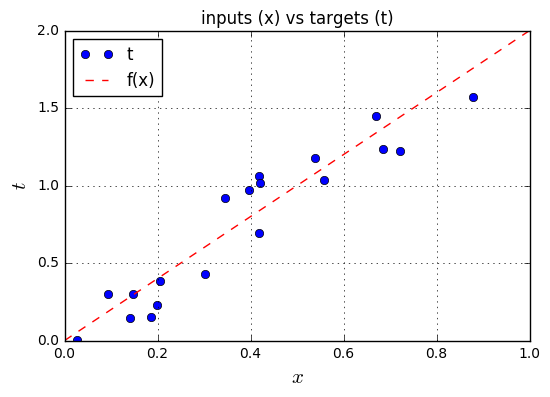

In [2]:
# Plot the target t versus the input x
plt.plot(x, t, 'o', label='t')
# Plot the initial line
plt.plot([0, 1], [f(0), f(1)], 'r--', label='f(x)')
plt.xlabel('$x$', fontsize=15)
plt.ylabel('$t$', fontsize=15)
plt.ylim([0,2])
plt.title('inputs (x) vs targets (t)')
plt.grid()
plt.legend(loc=2)
plt.show()

# Model, Loss function, chain rule and its derivative

Model can be visualized as below:  
<p align="center">
<img src="https://raw.githubusercontent.com/weichetaru/weichetaru.github.com/master/notebook/machine-learning/img/SimpleANN01.png"></p>

Model can be described as $y=x*w$. Note $t$ is our target data generated with noise. 

We can then define squared error cost as below:
$$\xi = \sum_{i=1}^{N}\left \| t_{i}  - y_{i}\right \|^{2} $$

and our goal is to minimize the loss:
$$\underset{w}{argmin}\sum_{i}^{N}\left \| t_{i}  - y_{i}\right \|^{2}$$

The `grandient decent` can be defined as:
$$w(k+1) = w(k) - \Delta w(k)$$
$$\Delta w(k) = \mu\frac{\partial \xi}{\partial w} \;\;\;  where \;\mu\; is\; learning\; rate$$

simplely apply `chain rule` here:
$$\frac{\partial \xi }{\partial w} = \frac{\partial y}{\partial w} \frac{\partial \xi }{\partial y} $$

we know 
$$\frac{\partial \xi_{i} }{\partial y_{i}}  = \frac{\partial (t_{i}-y_{i})^{2}}{\partial y_{i}}=2(y_{i}-t_{i})$$

and because $y=x*w$:
$$\frac{\partial y_{i}}{\partial w_{i}}=x_{i}$$

so combine everything we will get:
$$\Delta w = \mu * 2 * \sum_{i=1}^{N}x_{i}(y_{i}-t_{i})$$


# Code implementation

In [3]:
# Define the neural network function y = x * w
def nn(x, w): return x * w

# Define the cost function
def cost(y, t): return ((t - y)**2).sum()

# define the gradient function. Remember that y = nn(x, w) = x * w
def gradient(w, x, t): 
    return 2 * x * (nn(x, w) - t)

# define the update function delta w
def delta_w(w_k, x, t, learning_rate):
    return learning_rate * gradient(w_k, x, t).sum()

# Set the initial weight parameter
w = 0.1
# Set the learning rate
learning_rate = 0.1

# Start performing the gradient descent updates, and print the weights and cost:
nb_of_iterations = 4  # number of gradient descent updates
w_cost = [(w, cost(nn(x, w), t))] # List to store the weight,costs values
for i in range(nb_of_iterations):
    dw = delta_w(w, x, t, learning_rate)  # Get the delta w update
    w = w - dw  # Update the current weight parameter
    w_cost.append((w, cost(nn(x, w), t)))  # Add weight,cost to list

# Print the final w, and cost
for i in range(0, len(w_cost)):
    print('w({}): {:.4f} \t cost: {:.4f}'.format(i, w_cost[i][0], w_cost[i][1]))

w(0): 0.1000 	 cost: 13.6197
w(1): 1.5277 	 cost: 1.1239
w(2): 1.8505 	 cost: 0.4853
w(3): 1.9234 	 cost: 0.4527
w(4): 1.9399 	 cost: 0.4510


As you can see the $w$ is moving toward 2 with decreasing cost/loss.

#### check gradient decent process

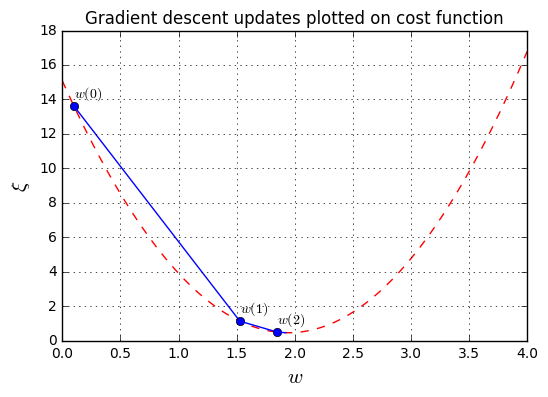

In [4]:
# Plot the cost vs the given weight w
# Define a vector of weights for which we want to plot the cost
ws = numpy.linspace(0, 4, num=100)  # weight values
cost_ws = numpy.vectorize(lambda w: cost(nn(x, w) , t))(ws)  # cost for each weight in ws

# Plot the first 2 gradient descent updates
plt.plot(ws, cost_ws, 'r--')  # Plot the error curve
# Plot the updates
for i in range(0, len(w_cost)-2):
    w1, c1 = w_cost[i]
    w2, c2 = w_cost[i+1]
    plt.plot(w1, c1, 'bo')
    plt.plot([w1, w2],[c1, c2], 'b-')
    plt.text(w1, c1+0.5, '$w({})$'.format(i)) 
# Show figure
plt.xlabel('$w$', fontsize=15)
plt.ylabel('$\\xi$', fontsize=15)
plt.title('Gradient descent updates plotted on cost function')
plt.grid()
plt.show()

The sample codes in this note come from [peterroelants.github.io](http://peterroelants.github.io/) where providing more details on neural netwrok and deep learning. It's very informative and highly recommanded. Here is more like my personal memo.